In [28]:
import pandas as pd
true_df = pd.read_csv("/content/drive/MyDrive/DATASETS/True.csv")
fake_df = pd.read_csv("/content/drive/MyDrive/DATASETS/Fake.csv")
true_df['label'] = 1
fake_df['label'] = 0
df = pd.concat([true_df, fake_df], ignore_index=True).sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(44898, 5)


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0


In [29]:
import re
custom_stopwords = set([
    "a", "an", "the", "and", "or", "if", "in", "on", "at", "to", "from", "with", "by", "of", "for",
    "is", "are", "was", "were", "it", "this", "that", "as", "be", "been", "but", "not", "no", "so",
    "we", "he", "she", "they", "them", "you", "i", "me", "my", "our", "us", "their"
])
def clean_text(text):
  text = text.lower()
  text = re.sub(r"http\S+|www\S+|https\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  text = re.sub(r"\d+", "", text)
  tokens = text.split()
  tokens = [word for word in tokens if word not in custom_stopwords]
  return " ".join(tokens)
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,title,text,subject,date,label,clean_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,donald trump s white house chaos trying cover ...
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,now donald trump presumptive gop nominee s tim...
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,mike pence huge homophobe supports exgay conve...
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,san francisco reuters california attorney gene...
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,twisted reasoning all comes pelosi these days ...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   clean_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [31]:
!pip install wordcloud tensorflow

In [32]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
df["char_count"] = df["clean_text"].apply(len)
df["avg_word_len"] = df["clean_text"].apply(lambda x: sum(len(w) for w in x.split()) / len(x.split()) if x.split() else 0)
df["unique_words"] = df["clean_text"].apply(lambda x: len(set(x.split())))
df.head()

,title,text,subject,date,label,clean_text,char_count,avg_word_len,unique_words
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,donald trump s white house chaos trying cover ...,1544,5.806167,174
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,now donald trump presumptive gop nominee s tim...,2170,5.385294,250
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,mike pence huge homophobe supports exgay conve...,1879,6.175573,201
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,san francisco reuters california attorney gene...,521,7.285714,54
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,twisted reasoning all comes pelosi these days ...,599,5.896552,73


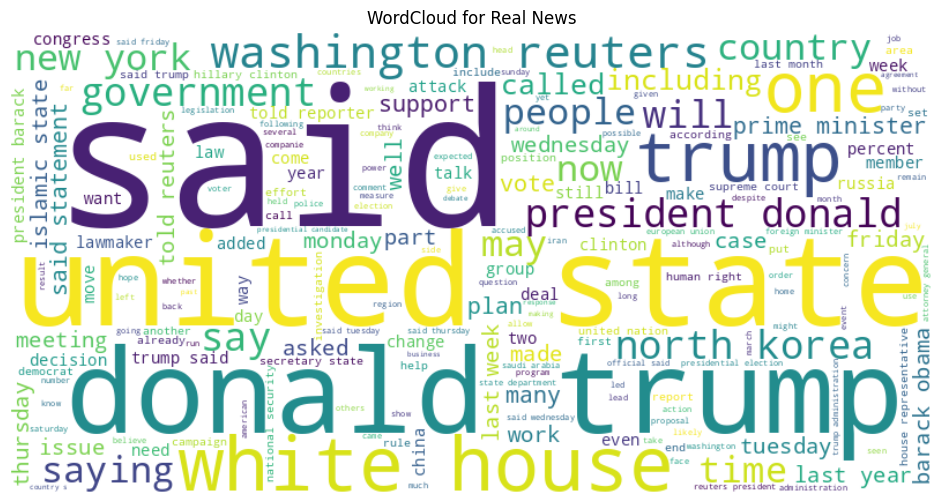

In [33]:
real_text = " ".join(df[df["label"] == 1]["clean_text"])
fake_text = " ".join(df[df["label"] == 0]["clean_text"])
plt.figure(figsize=(12, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Real News")
plt.show()

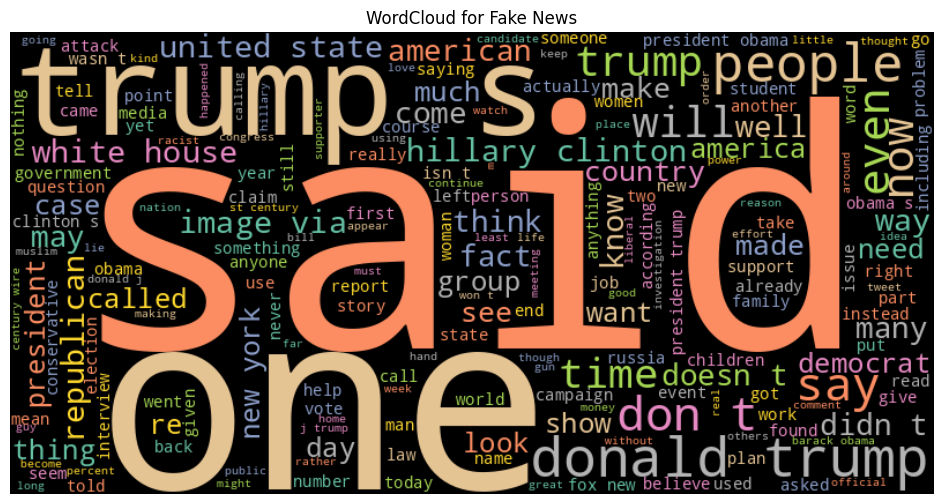

In [34]:
plt.figure(figsize=(12, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Fake News")
plt.show()

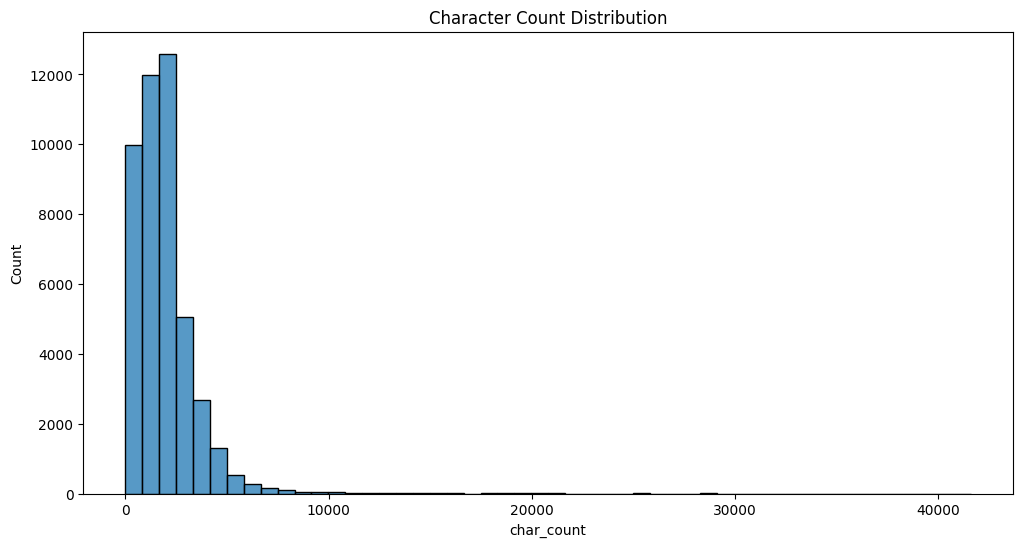

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df['char_count'],bins=50)
plt.title("Character Count Distribution")
plt.show()

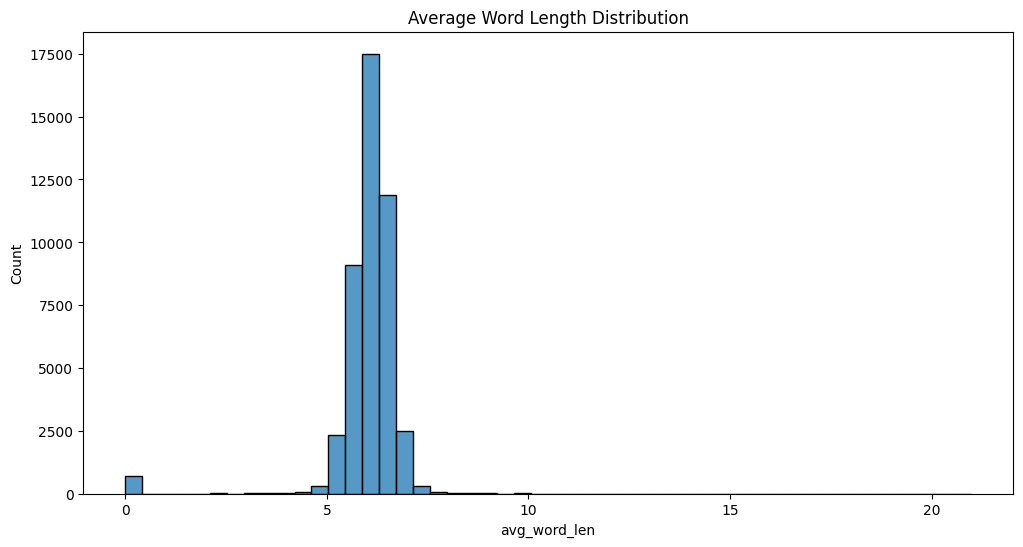

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df['avg_word_len'],bins=50)
plt.title("Average Word Length Distribution")
plt.show()

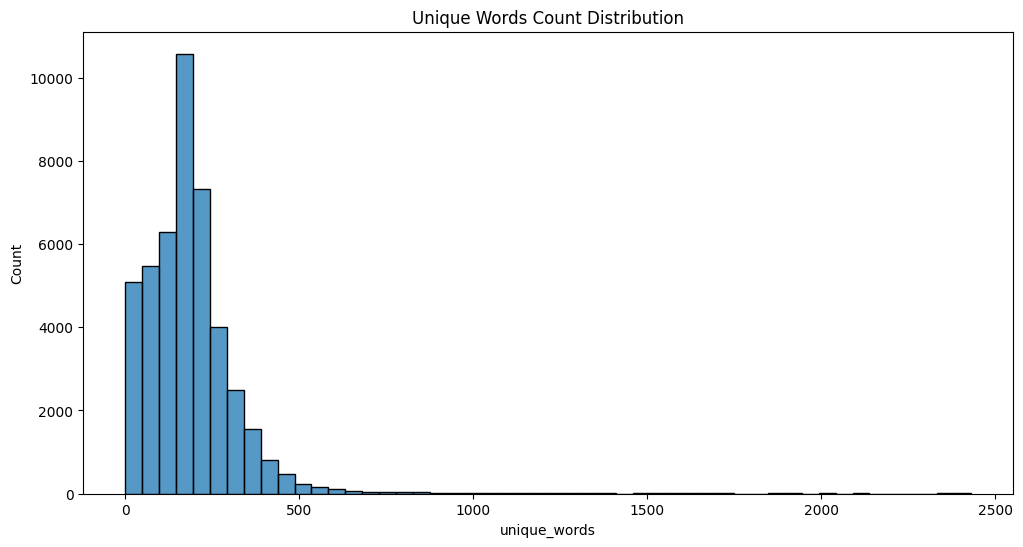

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df['unique_words'], bins=50)
plt.title("Unique Words Count Distribution")
plt.show()

In [38]:
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))
display(df.head())

,title,text,subject,date,label,clean_text,char_count,avg_word_len,unique_words,word_count
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,donald trump s white house chaos trying cover ...,1544,5.806167,174,227
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,now donald trump presumptive gop nominee s tim...,2170,5.385294,250,340
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,mike pence huge homophobe supports exgay conve...,1879,6.175573,201,262
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,san francisco reuters california attorney gene...,521,7.285714,54,63
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,twisted reasoning all comes pelosi these days ...,599,5.896552,73,87


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
additional_features = df[["word_count","char_count","avg_word_len","unique_words"]].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(additional_features)
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["clean_text"])
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

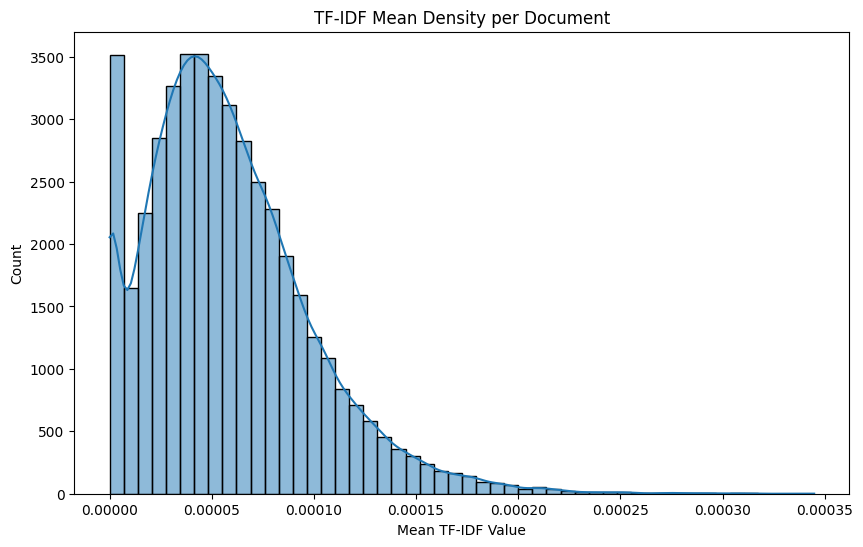

In [40]:
tfidf_means = X_tfidf[:, :5000].mean(axis=1).A1
plt.figure(figsize=(10, 6))
sns.histplot(tfidf_means, bins=50, kde=True)
plt.title("TF-IDF Mean Density per Document")
plt.xlabel("Mean TF-IDF Value")
plt.show()

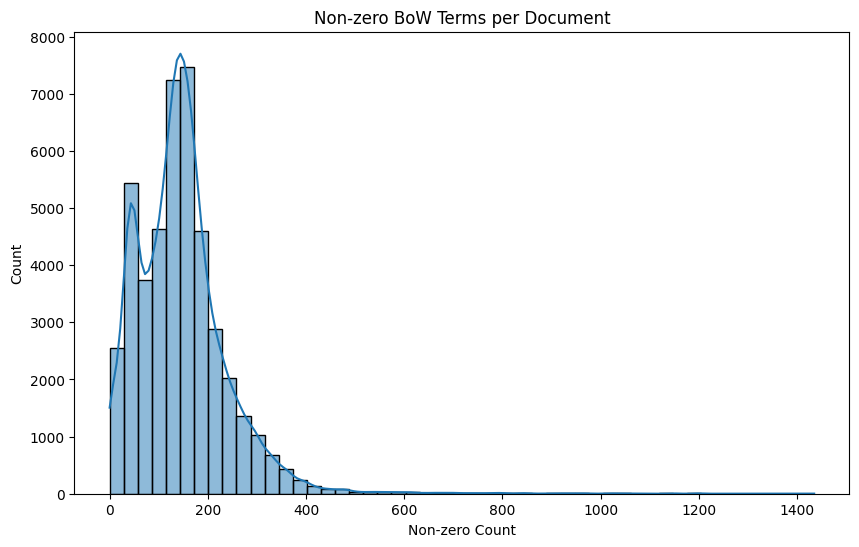

In [41]:
bow_nonzero = X_bow.getnnz(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(bow_nonzero, bins=50, kde=True)
plt.title("Non-zero BoW Terms per Document")
plt.xlabel("Non-zero Count")
plt.show()

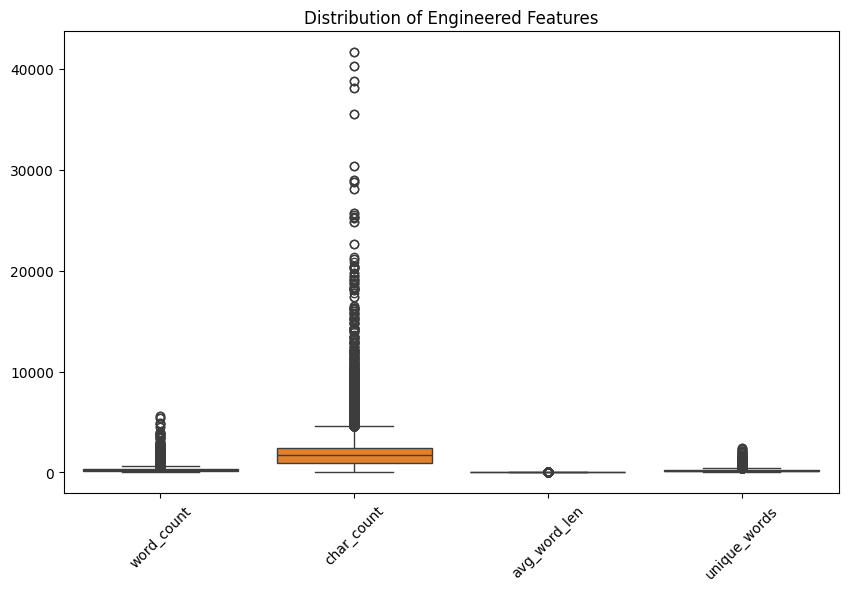

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['word_count', 'char_count', 'avg_word_len', 'unique_words']])
plt.title("Distribution of Engineered Features")
plt.xticks(rotation=45)
plt.show()

In [43]:
from scipy.sparse import hstack
X = hstack([X_tfidf, X_bow, scaled_features])
y = df["label"]
X

<COOrdinate sparse matrix of dtype 'float64'
	with 14903395 stored elements and shape (44898, 214048)>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import TFAutoModel, AutoTokenizer

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
for name, model in models.items():
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  print(f"---{name}---")
  print(classification_report(y_test,preds))

---Logistic Regression---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4669
           1       1.00      1.00      1.00      4311

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

---Random Forest---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4669
           1       0.99      1.00      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

---Gradient Boosting---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4669
           1       0.99      1.00      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weig

In [46]:
model_dnn = Sequential([
    Dense(256,input_shape=(X.shape[1],),activation='relu'),
    Dropout(0.4),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])
model_dnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_dnn.fit(X_train,y_train,epochs=4,batch_size=64,validation_split=0.2)
dl_preds_dnn = model_dnn.predict(X_test) > 0.5
print("--- Deep Learning (DNN) ---")
print(classification_report(y_test,dl_preds_dnn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
449/449 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9363 - loss: 0.1785 - val_accuracy: 0.9937 - val_loss: 0.0299
Epoch 2/4
449/449 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.9950 - loss: 0.0213 - val_accuracy: 0.9944 - val_loss: 0.0258
Epoch 3/4
449/449 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9947 - val_loss: 0.0436
Epoch 4/4
449/449 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9937 - val_loss: 0.0513
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step
--- Deep Learning (DNN) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [47]:
max_words = 5000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["clean_text"])
X_seq = tokenizer.texts_to_sequences(df["clean_text"])
X_pad = pad_sequences(X_seq,maxlen=max_len)
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad,y,test_size=0.2,random_state=42)

In [48]:
model_rnn = Sequential([
    Embedding(max_words,128,input_length=max_len),
    SimpleRNN(128,return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_rnn.fit(X_train_pad,y_train_pad,epochs=3,batch_size=64,validation_split=0.2)
rnn_preds = model_rnn.predict(X_test_pad) > 0.5
print("--- Deep Learning (RNN) ---")
print(classification_report(y_test_pad,rnn_preds))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 283s 619ms/step - accuracy: 0.8524 - loss: 0.3018 - val_accuracy: 0.9598 - val_loss: 0.1265
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 321s 616ms/step - accuracy: 0.9410 - loss: 0.1590 - val_accuracy: 0.6645 - val_loss: 0.9256
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 316s 604ms/step - accuracy: 0.9108 - loss: 0.2357 - val_accuracy: 0.8852 - val_loss: 0.2774
281/281 ━━━━━━━━━━━━━━━━━━━━ 27s 95ms/step
--- Deep Learning (RNN) ---
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      4669
           1       0.81      0.99      0.89      4311

    accuracy                           0.89      8980
   macro avg       0.90      0.89      0.89      8980
weighted avg       0.90      0.89      0.88      8980



In [49]:
model_lstm = Sequential([
    Embedding(max_words,128,input_length=max_len),
    LSTM(128,return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.fit(X_train_pad,y_train_pad,epochs=3,batch_size=64,validation_split=0.2)
lstm_preds = model_lstm.predict(X_test_pad) > 0.5
print("--- Deep Learning (LSTM) ---")
print(classification_report(y_test_pad,lstm_preds))

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 1015s 2s/step - accuracy: 0.8936 - loss: 0.2444 - val_accuracy: 0.9795 - val_loss: 0.0767
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 994s 2s/step - accuracy: 0.9899 - loss: 0.0385 - val_accuracy: 0.9937 - val_loss: 0.0240
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 1059s 2s/step - accuracy: 0.9948 - loss: 0.0192 - val_accuracy: 0.9948 - val_loss: 0.0184
281/281 ━━━━━━━━━━━━━━━━━━━━ 105s 373ms/step
--- Deep Learning (LSTM) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4669
           1       0.99      1.00      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [50]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
def chatbot_response(query):
    cleaned_query = clean_text(query)

    words = cleaned_query.split()
    word_count = len(words)
    char_count = len(cleaned_query)
    avg_word_len = np.sum([len(word) for word in words]) / word_count if word_count > 0 else 0
    unique_words = len(set(words))

    stats_features = np.array([[word_count, char_count, avg_word_len, unique_words]])

    stats_scaled = scaler.transform(stats_features)

    tfidf_features = vectorizer.transform([cleaned_query])
    bow_features = bow_vectorizer.transform([cleaned_query])

    X_query = hstack([tfidf_features, bow_features, stats_scaled])

    prediction_prob = model_dnn.predict(X_query)[0][0]  # prediction probability
    label = "REAL" if prediction_prob > 0.5 else "FAKE"

    response = f"Based on our analysis, the news article appears to be: {label}.\n(Prediction probability: {prediction_prob:.2f})"
    return response

sample_query = "President signs a new healthcare bill that will improve lives."
print(chatbot_response(sample_query))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Based on our analysis, the news article appears to be: FAKE.
(Prediction probability: 0.00)
